# Analaysis of deep learning models segmentation performance for rescaled images
This notebook allows to compare the results obtained for segmentation across image resolutions. The notebook will compute the following metrics and provide plots to visualise the results: 
- Mean Intersection-over-Union (IoU) as described in the Cell Tracking Challenge (True positives identified with a minimum of 50% overlap).
- Morphological features (e.g., Diameter)
- Theoretical throughput

1. **INPUT_DIR**  
   - Path to the folder containing the input images and the annotations, stored as `.tiff`files.
   - The input directory is expected to have the following structure:
        - **DATASET (e.g., Saureus_instance_segmentation)**
            * **OG**
                * GT
                    - images.tiff
                * Prediction
                    - images.tiff
            * **downsampling_2**
                * GT
                    - images.tiff
                * Prediction
                    - images.tiff
 
   - Example: `/path/to/your/input`
2. **DOWNSAMPLE_FACTORS**  

**Expected output**:
- A new folder (`Results`) in the main directory with `.csv`files containing the numerical data for the assessment.
- Images of true positives, false positives, and false negatives for each image.



### 1. Import dependencies

In [1]:
from rescale4dl.morphology import morphology
from rescale4dl.morphology import generate_binary_semantic_box_plot, generate_semantic_gt_pred_bar_plot,\
generate_instance_box_plot, generate_instance_gt_pred_bar_plot, generate_instance_wt_treatment_bar_plot
from rescale4dl.morphology import microscope_FOV_area, obj_per_microscope_FOV
import shutil
import os
import matplotlib.pyplot as plt
from tifffile import imread

### 2. Compile statistics

In [ ]:
# Directory with folders of sampling folders with GT and Prediction folder pairs inside
INPUT_DIR = '../Examples/segmentation_results/'

# Calculate object properties statistics
morphology(INPUT_DIR)

#### 2.1 Display some of the example results

- Display an example ground truth labelling, the prediction and the difference between them.
1. **DATASET**  
   - Name of the dataset to display (e.g., `DATASET = "Saureus_instance_segmentation"`)
2. **SCALING**
   - Name of the folder corresponding to the scaling example to display (e.g., `SCALING = "downsampling_4"`)

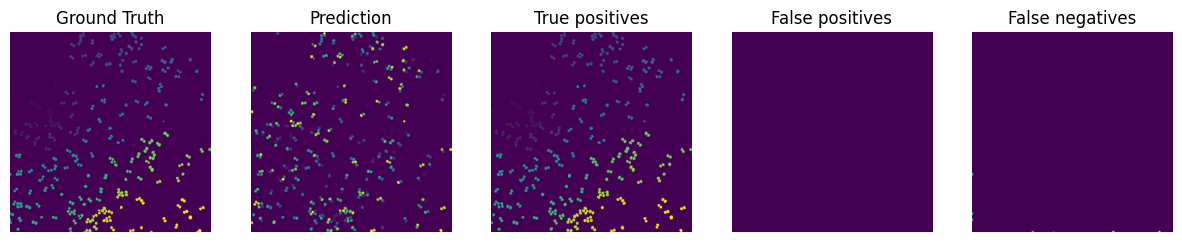

In [4]:
DATASET = "Saureus_instance_segmentation" # Name of the dataset
SCALING = "downsampling_4" # Name of the scaling folder

example_images_dir = os.path.join(INPUT_DIR, DATASET, SCALING)
example_images_dir_GT = os.path.join(example_images_dir, "GT")
example_images_dir_Prediction = os.path.join(example_images_dir, "Prediction")
example_images_results_dir = os.path.join(INPUT_DIR, DATASET, "Results", SCALING)

example_image = [i for i in os.listdir(example_images_dir_GT) if i.__contains__("tif")][0]
example_image = example_image.split(".tif")[0]


## Display example images
plt.figure(figsize=(15,10))
plt.subplot(1,5,1)
plt.imshow(imread(os.path.join(example_images_dir_GT, f"{example_image}.tif")))
plt.axis(False)
plt.title("Ground Truth")
plt.subplot(1,5,2)
plt.imshow(imread(os.path.join(example_images_dir_Prediction,  f"{example_image}.tif")))
plt.title("Prediction")
plt.axis(False)
plt.subplot(1,5,3)
plt.imshow(imread(os.path.join(example_images_results_dir, f"{example_image}_true_positives.tif")))
plt.title("True positives")
plt.axis(False)
plt.subplot(1,5,4)
plt.imshow(imread(os.path.join(example_images_results_dir, f"{example_image}_false_positives.tif")))
plt.title("False positives")
plt.axis(False)
plt.subplot(1,5,5)
plt.imshow(imread(os.path.join(example_images_results_dir, f"{example_image}_false_negatives.tif")))
plt.title("False negatives")
plt.axis(False)
plt.show()

### 3. Unzip example data from the paper (Optional)
We provide the results obtained with the experiments in ReScale4DL publication that can be used to reproduce the original plots in the publication. These are stored in ReScale4DL repository at `Examples/analysis_results`. 
Provide the following parameters: 
1. **DATASET**
    - One of the following ones:
        - `"Saureus_instance_segmentation", "Deepbacs_Instance_Segmentation", "Deepbacs_Semantic_Segmentation", "Saureus_instance_segmentation_pc190723", "Saureus_instance_segmentation", "Worm_Semantic_Segmentation"`
3. **ANALYSIS_DIR**
    - The absolute path to `"Examples/analysis_results"`


In [ ]:
# Params
DATASET = "Deepbacs_Semantic_Segmentation" 
ANALYSIS_DIR = "/Users/esti/Documents/PROYECTOS/DOWNSAMPLING/ReScale4DL/Examples/analysis_results/"

# Unzip
filename = os.path.join(ANALYSIS_DIR, f"{DATASET}.zip")
extract_dir = os.path.join(ANALYSIS_DIR)
shutil.unpack_archive(filename, extract_dir)

### 4. Plot analytical results

#### Semantic segmentation
Example dataset: "Deepbacs_Semantic_Segmentation"
**Expected parameters**
1. **ANALYSIS_DIR**
   - Main directory where the DATASET folder stores all the csv files for morphology
2. **DATASET**
   - Name of the dataset, which also corresponds with its folder name, e.g., `DATASET = "Deepbacs_Semantic_Segmentation"`
3. **IMAGE_SIZES**
   - Path to the csv file containing basic information about the dataset. For the example data in the `segmentation_results` folder, the csv file can be found at `segmentation_results/DATASET/DATASET_dataset_info.csv`. For the paper results in the `analysis_results`, the csv file can be found at `analysis_results/dataset_info.csv`
4. **ORIGINAL_DATASET_FOLDERNAME**
   - The name of the folder in DATASET that corresponds to the original data. `"OG"` for the example data in `segmentation_results`; `"og"` for the example data in `"analysis_results"`.
5. **OUTPUT_DIR**
   - A directory to save the plots.

DONE!
DONE!


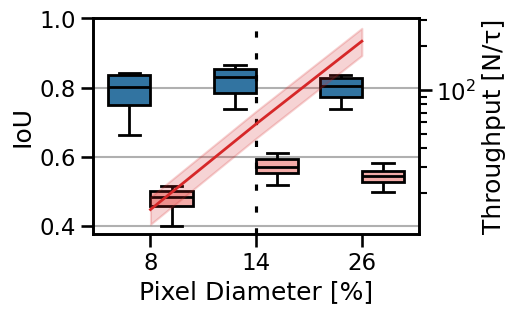

In [18]:
ANALYSIS_DIR = "/Users/esti/Documents/PROYECTOS/DOWNSAMPLING/ReScale4DL/Examples/segmentation_results"
DATASET = "Deepbacs_Semantic_Segmentation"
IMAGE_SIZES = os.path.join(ANALYSIS_DIR,DATASET, f"{DATASET}_dataset_info.csv")
OUTPUT_DIR = os.path.join(ANALYSIS_DIR, DATASET, "Results", "plots")
ORIGINAL_DATASET_FOLDERNAME = "OG" 
## Run
dataset_name_match_dict = {DATASET: DATASET}
fig_name = f"IoU for {DATASET}"
y_axis = "IoU"
os.makedirs(OUTPUT_DIR, exist_ok=True)

generate_binary_semantic_box_plot(ANALYSIS_DIR,
                                  DATASET,
                                DATASET,
                                fig_name, 
                                y_axis, 
                                thoughput_plot=True, 
                                y_axis_2 = "Obj_per_FOV_mean",
                                metrics_csv_path=IMAGE_SIZES,
                                original_folder_name = ORIGINAL_DATASET_FOLDERNAME,
                                dataset_name_match_dict=dataset_name_match_dict,
                                output_path=OUTPUT_DIR)

##### Comparison of morphological metrics

DONE!


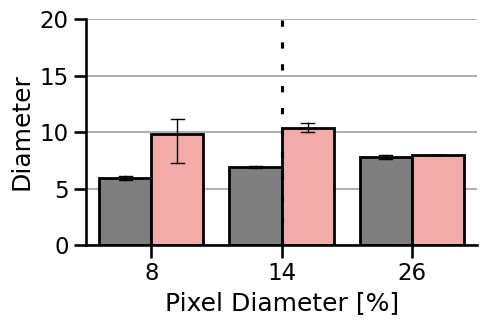

In [11]:
ANALYSIS_DIR = "/Users/esti/Documents/PROYECTOS/DOWNSAMPLING/ReScale4DL/Examples/segmentation_results"
DATASET = "Deepbacs_Semantic_Segmentation"
OUTPUT_DIR = os.path.join(ANALYSIS_DIR, DATASET,"plots")

##
fig_name = f"IoU for {DATASET}"
y_axis = "IoU"

os.makedirs(OUTPUT_DIR, exist_ok=True)

generate_semantic_gt_pred_bar_plot(ANALYSIS_DIR, 
                           DATASET, 
                           fig_name,
                           output_path=OUTPUT_DIR)


#### Instance segmentation
Example dataset = "Saureus_instance_segmentation" and "Saureus_instance_segmentation_pc190723"

**Expected parameters**
1. **ANALYSIS_DIR**
   - Main directory where the DATASET folder stores all the csv files for morphology
2. **DATASET**
   - Name of the dataset, which also corresponds with its folder name, e.g., `DATASET = "Saureus_instance_segmentation"`
3. **IMAGE_SIZES**
   - Path to the csv file containing basic information about the dataset. For the example data in the `segmentation_results` folder, the csv file can be found at `segmentation_results/DATASET/DATASET_dataset_info.csv`. For the paper results in the `analysis_results`, the csv file can be found at `analysis_results/dataset_info.csv`
4. **ORIGINAL_DATASET_FOLDERNAME**
   - The name of the folder in DATASET that corresponds to the original data. `"OG"` for the example data in `segmentation_results`; `"og"` for the example data in `"analysis_results"`.
5. **OUTPUT_DIR**
   - A directory to save the plots.

DONE!
DONE!


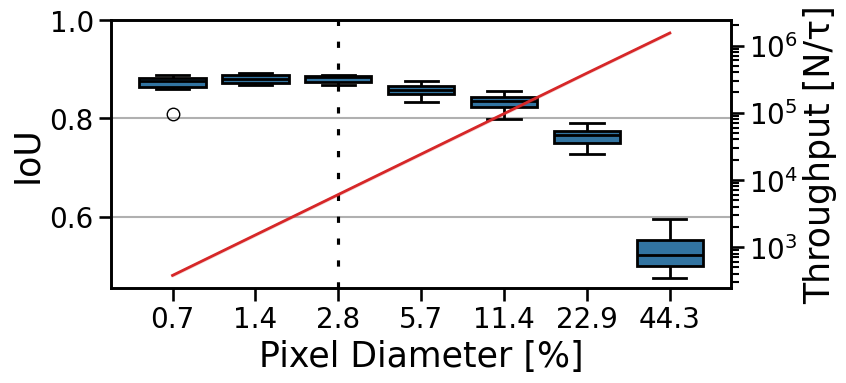

In [3]:
ANALYSIS_DIR = "/Users/esti/Documents/PROYECTOS/DOWNSAMPLING/ReScale4DL/Examples/analysis_results"
DATASET = "Saureus_instance_segmentation"
dataset_name_match_dict = {DATASET: DATASET}
IMAGE_SIZES = os.path.join(ANALYSIS_DIR, "dataset_info.csv")
ORIGINAL_DATASET_FOLDERNAME = "OG" 
OUTPUT_DIR = os.path.join(ANALYSIS_DIR, DATASET,"plots")

##
fig_name = f"IoU for {DATASET}"
y_axis = "IoU"

os.makedirs(OUTPUT_DIR, exist_ok=True)

generate_instance_box_plot(ANALYSIS_DIR, 
                           DATASET, 
                           fig_name, 
                           y_axis, 
                           thoughput_plot=True, 
                           y_axis_2 = "Obj_per_FOV_mean",
                           metrics_csv_path=IMAGE_SIZES,
                           original_folder_name = "og",
                           dataset_name_match_dict=dataset_name_match_dict,
                           output_path=output_path)

DONE!
DONE!


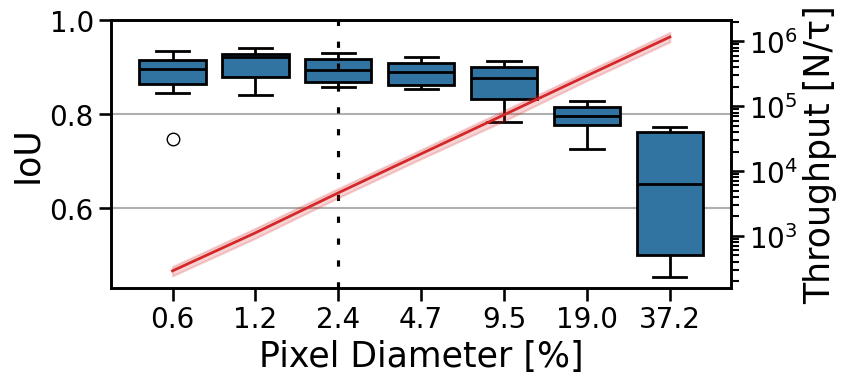

In [7]:
ANALYSIS_DIR = "/Users/esti/Documents/PROYECTOS/DOWNSAMPLING/ReScale4DL/Examples/analysis_results"
DATASET = "Saureus_instance_segmentation_pc190723"
dataset_name_match_dict = {DATASET: DATASET}
IMAGE_SIZES = os.path.join(ANALYSIS_DIR, "dataset_info.csv")
ORIGINAL_DATASET_FOLDERNAME = "OG" 
OUTPUT_DIR = os.path.join(ANALYSIS_DIR, DATASET,"plots")

##
fig_name = f"IoU for {DATASET}"
y_axis = "IoU"

os.makedirs(OUTPUT_DIR, exist_ok=True)

generate_instance_box_plot(ANALYSIS_DIR, 
                           DATASET, 
                           fig_name, 
                           y_axis, 
                           thoughput_plot=True, 
                           y_axis_2 = "Obj_per_FOV_mean",
                           metrics_csv_path=IMAGE_SIZES,
                           original_folder_name = "og",
                           dataset_name_match_dict=dataset_name_match_dict,
                           output_path=OUTPUT_DIR)

##### Comparison of morphological metrics

DONE!


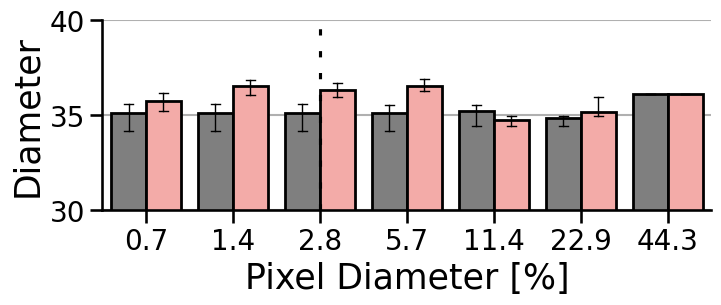

In [10]:
ANALYSIS_DIR = "/Users/esti/Documents/PROYECTOS/DOWNSAMPLING/ReScale4DL/Examples/analysis_results"
DATASET = "Saureus_instance_segmentation"
OUTPUT_DIR = os.path.join(ANALYSIS_DIR, DATASET,"plots")

##
fig_name = f"IoU for {DATASET}"
os.makedirs(OUTPUT_DIR, exist_ok=True)
generate_instance_gt_pred_bar_plot(ANALYSIS_DIR, 
                           DATASET, 
                           fig_name,
                           output_path=OUTPUT_DIR)
